## Application on Telecom Company Data

### Table of Contents

- [Data Structure](#h0_cell)
- [Descriptive Statistics](#h1_cell)
- [Visualization](#h1_2_cell)
- [Correlations ](#h2_cell)


Data exploration allows us to extract insights before we even start building models. 

In this lesson, we will explore data from the <a href="https://www.vertica.com/python/data/churn.csv"> Telco Churn dataset</a>.

### What you will achieve in this module:

- Produce basic descriptive statistics about data.
- Create different plots to represent data. 
- Detect outliers.
- Find correlations between variables.
- Discover causal relationship between variables and outputs.

***

<a id='h0_cell'></a>
### Data Structure

The first phase of data exploration is to look at the structure of the data, understand the types of data in each column, and find the total number of data points (which is usually the number of rows in the dataset). 

In order to explore the data, we must ingest the churn dataset into VerticaPy:

```python
import verticapy as vp
data_vdf=vp.read_csv("churn.csv")
```

In [1]:
import verticapy as vp
data_vdf=vp.read_csv("data/churn.csv")

We see that there are 21 columns, consisting of 20 *features* and 1 *response* (i.e. "Churn"--the customer left the product). 
Customers leaving and taking their business elsewhere is obviously an undesired outcome. It is crucial for any enterprise to understand what contributing factors resulted in the *churn* of a customer.

Looking at the data, we can try to understand which *features* were most important in their decision to leave. Intuitively, we know that the customerID will not, or should not, have any effect on whether a customer leaves. That leaves us with 19 *features* to explore. 

To avoid any ambiguity in the interpretation of the data, we should look carefully at each column of *features* to understand what it means. In this dataset, we can see that most of the *features*, like gender, are categorical and take on a fixed set of values. Only a few of the *features*, like tenure and monthly charges, are numerical. For both numerical and categorical features, we can extract detailed descriptive statistics, which we will explore in the next section.

***

<a id='h1_cell'></a>
### Descriptive Statistics


Descriptive statistics can summarize and describe the dataset's characteristics, such as the data's center, spread, variability, and frequency. These statistics are sometimes referred to as aggregates since they involve extracting information from the entire aggregate of the dataset.

Let's look at some basic aggregates on our churn data:

```python
data_vdf.describe()
```

,count,mean,std,min,approx_25%,approx_50%,approx_75%,max
"""SeniorCitizen""",7043,0.162146812437882,0.368611605610013,0.0,0.0,0.0,0.0,1.0
"""Partner""",7043,0.483032798523356,0.499747510719986,0.0,0.0,0.0,1.0,1.0
"""Dependents""",7043,0.299588243646173,0.458110167510015,0.0,0.0,0.0,1.0,1.0
"""tenure""",7043,32.3711486582423,24.5594810230944,0.0,9.0,29.0,55.0,72.0
"""PhoneService""",7043,0.903166264375975,0.295752231783635,0.0,1.0,1.0,1.0,1.0
"""PaperlessBilling""",7043,0.592219224762175,0.491456924049407,0.0,0.0,1.0,1.0,1.0
"""MonthlyCharges""",7043,64.761692460599,30.0900470976785,18.25,35.5,70.3214285714286,89.85,118.75
"""TotalCharges""",7032,2283.30044084188,2266.77136188315,18.8,402.683333333333,1397.475,3798.2375,8684.8
"""Churn""",7043,0.265369870793694,0.441561305121947,0.0,0.0,0.0,1.0,1.0

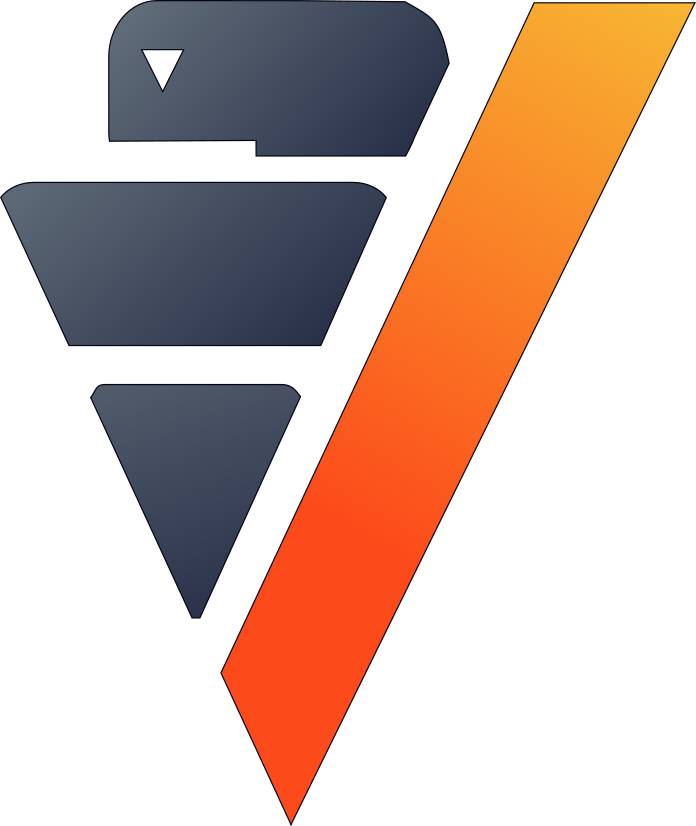

In [2]:
data_vdf.describe()

The first column represents the total count of each column. We can see that TotalCharges has one missing value. We can start to get an idea of the spread of the data by looking at standard deviation (std) and percentiles. 

For the categorical variables, we can get further details like cardinaility:

```python
data_vdf[data_vdf.catcol()].nunique()
```

,approx_unique
"""customerID""",7000.0
"""gender""",2.0
"""SeniorCitizen""",2.0
"""Partner""",2.0
"""Dependents""",2.0
"""PhoneService""",2.0
"""MultipleLines""",3.0
"""InternetService""",3.0
"""OnlineSecurity""",3.0
"""OnlineBackup""",3.0

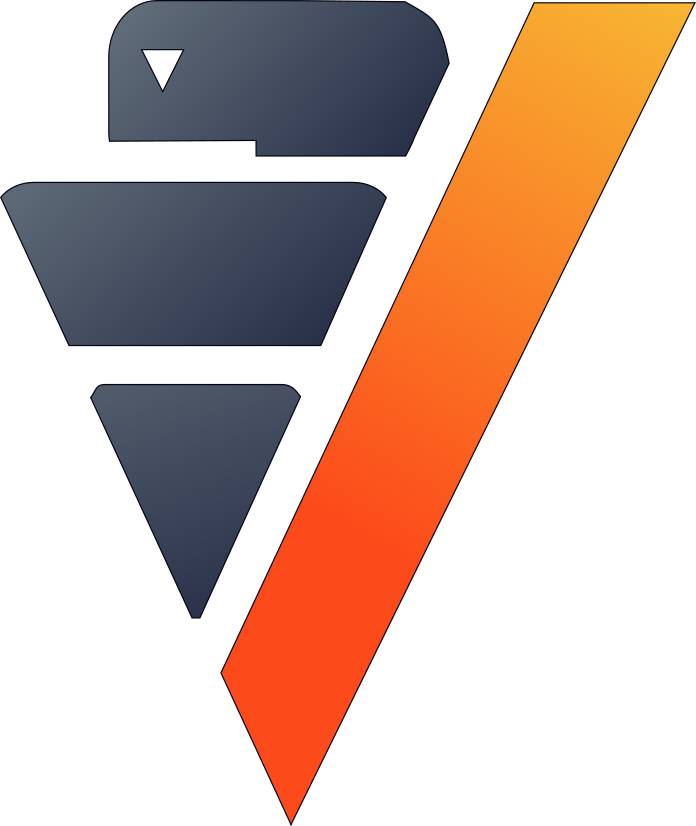

In [3]:
data_vdf[data_vdf.catcol()].nunique()

<div class="alert alert-block alert-success">
<b>Cardinality:</b> The number of unique values a categorical variable can take.
</div>

**Note:** The VerticaPy function [nunique](https://www.vertica.com/python/documentation_last/vdataframe/vcolumn-methods/nunique/) has a parameter *approx*, which is true by default. This parameter enables us to get an approximate number of cardinality by efficiently sampling the data. As a result, the computation is very fast. The user can set *approx* to false to get a more accurate answer, but at the added cost of computational time.

***

<a id='h1_2_cell'></a>
### Visualization



We can visualize the data in order to understand it from different angles. 

For example, let's explore the distribution of some of the categorical *features*:

```python
data_vdf["gender"].hist()
```

<AxesSubplot:xlabel='"gender"', ylabel='Density'>

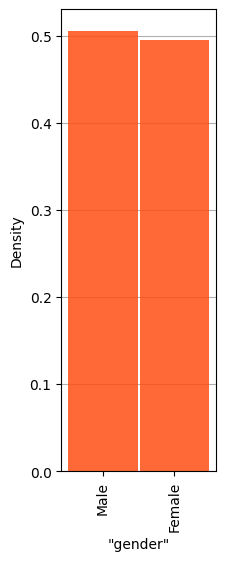

In [4]:
data_vdf["gender"].hist()

This tells us that the data is almost equally distributed between the two genders, and thus there is little bias in the data in terms of gender. 

We can even visualize multiple features together in bar plots:

```python
data_vdf.bar(["gender","Dependents"])
```

<AxesSubplot:xlabel='Density', ylabel='"gender"'>

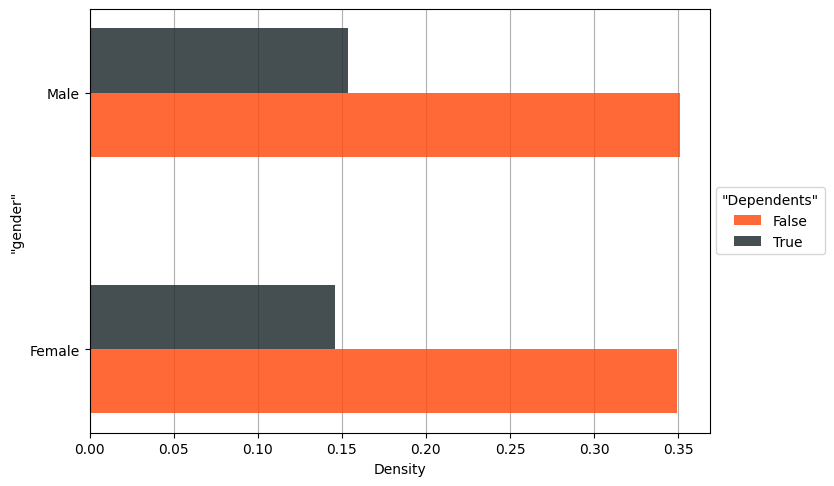

In [5]:
data_vdf.bar(["gender","Dependents"])

The resulting plot shows that a nearly equal proportion of females and males in our dataset have dependents. To be more precise, we see that females have a slighlty lower rate of dependents. Such graphs enable us to understand customer demographics.

Now we can look at the histogram of our *response* column (i.e., churn):

```python
data_vdf["churn"].hist()
```

<AxesSubplot:xlabel='"Churn"', ylabel='Density'>

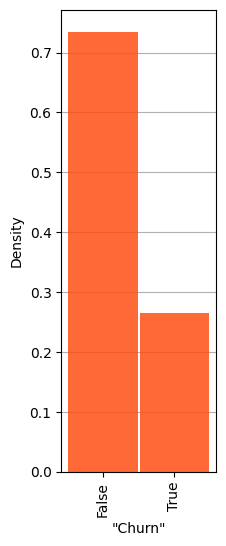

In [6]:
data_vdf["churn"].hist()

There is clearly a bias in the data, as we see most of the values in churn are skewed towards False. Such visualizations help us identify biases. Using VerticaPy's function [balance](https://www.vertica.com/python/documentation_last/vdataframe/main-methods/balance/index.php), we can easily sort this bias out:

```python
data_vdf=data_vdf.balance(column="churn",
                 method="hybrid",
                         x=0.5)
```

In [7]:
data_vdf=data_vdf.balance(column="churn",
                 method="hybrid",
                         x=0.5)

By setting the ratio (x) to 0.5, we are able to make sure that both the values in the churn column are equally represented. While doing this, we want to keep an eye out for how much data we are losing, so it is a good practice to check the count before and after balancing. A helpful function for this is the shape funciton. 

```python
data_vdf.shape()
```

In [8]:
data_vdf.shape()

(3734, 21)

***

### Correlations

<a id='h2_cell'></a>

#### Feature-Feature

Another step in data exploration is to look at the correlations amongst the features. This information is very important because highly correlated features might limit the type of models we use, as well as decrease the accuracy of the model in certain cases.

The VerticaPy [corr function](https://www.vertica.com/python/documentation_last/vdataframe/main-methods/corr/) allows many options for calculating the correlations. Let's start by extracting the Pearson correlation, which tells us about the linear correlation of numerical features:

```python
data_vdf.corr(method = "pearson")
```

,"""SeniorCitizen""","""Partner""","""Dependents""","""tenure""","""PhoneService""","""PaperlessBilling""","""MonthlyCharges""","""TotalCharges""","""Churn"""
"""SeniorCitizen""",1.0,0.0197105330187064,-0.214638755641124,0.00474592356019623,0.000686877372884031,0.156336177812427,0.20818299237151,0.0783879527895526,0.173970259792091
"""Partner""",0.0197105330187064,1.0,0.444996098026576,0.371501282045625,0.0287707551466119,-0.0197503911999009,0.0932592060274232,0.321221244805989,-0.172910479342195
"""Dependents""",-0.214638755641124,0.444996098026576,1.0,0.165518758035846,0.0280464857488389,-0.129639139024425,-0.12860584361173,0.0710196767204474,-0.212727405515105
"""tenure""",0.00474592356019623,0.371501282045625,0.165518758035846,1.0,0.0255683485824232,0.000458341451402851,0.235256943434193,0.857180427875878,-0.395190213025397
"""PhoneService""",0.000686877372884031,0.0287707551466119,0.0280464857488389,0.0255683485824232,1.0,0.0140326442758106,0.304801249941805,0.123623700054139,0.0184969842038479
"""PaperlessBilling""",0.156336177812427,-0.0197503911999009,-0.129639139024425,0.000458341451402851,0.0140326442758106,1.0,0.343958815473514,0.127021561873989,0.227334345457216
"""MonthlyCharges""",0.20818299237151,0.0932592060274232,-0.12860584361173,0.235256943434193,0.304801249941805,0.343958815473514,1.0,0.589820334807288,0.238612886245695
"""TotalCharges""",0.0783879527895526,0.321221244805989,0.0710196767204474,0.857180427875878,0.123623700054139,0.127021561873989,0.589820334807288,1.0,-0.223748546433592
"""Churn""",0.173970259792091,-0.172910479342195,-0.212727405515105,-0.395190213025397,0.0184969842038479,0.227334345457216,0.238612886245695,-0.223748546433592,1.0

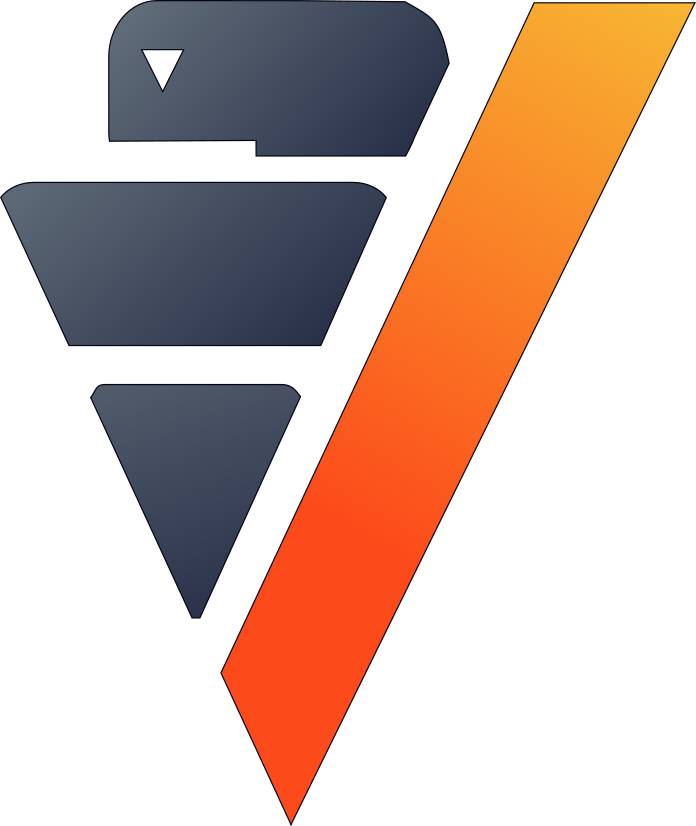

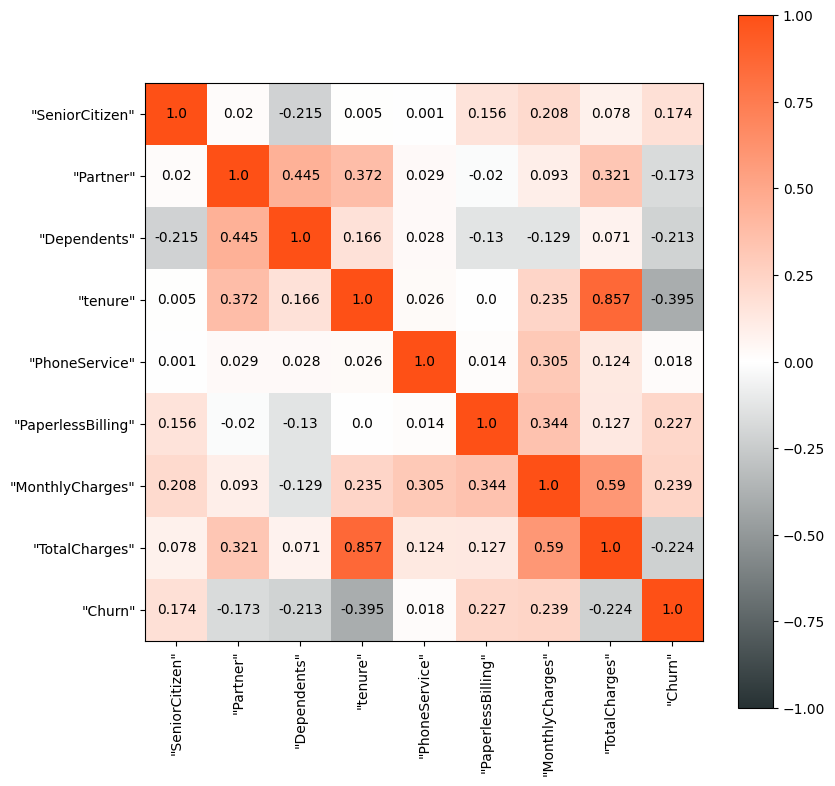

In [9]:
data_vdf.corr(method = "pearson")

We see that the TotalCharges are highly correlated with tenure. If we were going to apply Linear Regression, we would take out these highly correlated terms. In order to visualize the correlation, we can create a scatter plot:

```python
data_vdf.scatter(["tenure", "TotalCharges"])
```

<AxesSubplot:xlabel='"tenure"', ylabel='"TotalCharges"'>

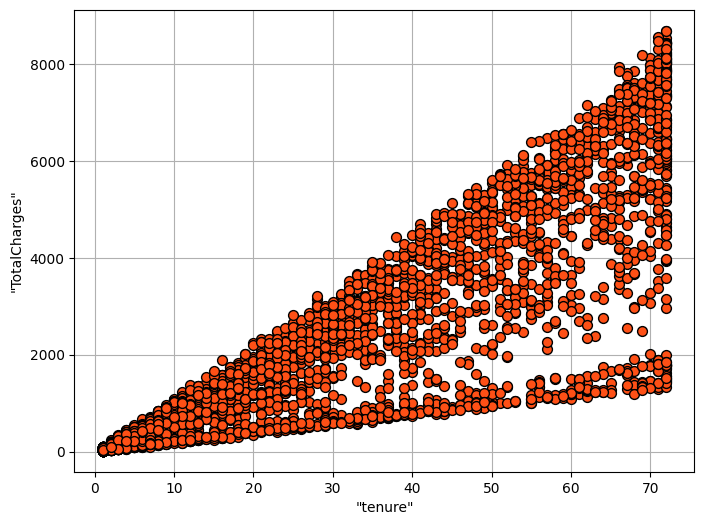

In [10]:
data_vdf.scatter(["tenure", "TotalCharges"])

Though Pearson correlation is great for finding linear correlations, we sometimes want to find the Spearman correlation. Spearman correlation captures monotonously increasing/decreasing relationships between terms and covers non-linear relationships.

<b>Note:</b> The table only outputs the Pearson correlation of numerical columns, even though some of these numerical columns are in essense categorical (e.g., PaperlessBilling). 

Remembering the cardinality of these numerical variables, we realize that they have a maximum cardinality of 2 (i.e. they are binary). Binary features are considered numerical in these correaltions, but this is not technically accurate. Since binary variables can only take two values, calculating correlations between a binary and a numerical variable can lead to misleading results. To account for this, we'll want to use the 'Biserial Point' method to calculate the Point-Biserial correlation coefficient. This powerful method will help us understand the link between a binary variable and a numerical variable.

```python
data_vdf.corr(method = "biserial")
```

  0%|          | 0/9 [00:00<?, ?it/s]

,"""SeniorCitizen""","""Partner""","""Dependents""","""tenure""","""PhoneService""","""PaperlessBilling""","""MonthlyCharges""","""TotalCharges""","""Churn"""
"""SeniorCitizen""",1,0.0197078935097533,-0.214610012587009,0.00474528801636207,0.000686785390644203,0.156315242267933,0.208155113832064,0.0783774386787425,0.173946962803732
"""Partner""",0.0197078935097533,1,0.444936506985395,0.371451532961767,0.0287669023504584,-0.0197477463533943,0.0932467173489507,0.321178159668002,-0.172887324272879
"""Dependents""",-0.214610012587009,0.444936506985395,1,0.165496592818735,0.028042729942227,-0.129621778577206,-0.12858862153685,0.0710101509103695,-0.212698918416817
"""tenure""",0.00474528801636207,0.371451532961767,0.165496592818735,1,nan,nan,nan,nan,nan
"""PhoneService""",0.000686785390644203,0.0287669023504584,0.028042729942227,nan,1,0.0140307651135289,0.304760432901122,0.123607118510234,0.0184945072056173
"""PaperlessBilling""",0.156315242267933,-0.0197477463533943,-0.129621778577206,nan,0.0140307651135289,1,0.343912754701236,0.127004524577706,0.22730390229063
"""MonthlyCharges""",0.208155113832064,0.0932467173489507,-0.12858862153685,nan,0.304760432901122,0.343912754701236,1,nan,0.238580932728814
"""TotalCharges""",0.0783774386787425,0.321178159668002,0.0710101509103695,nan,0.123607118510234,0.127004524577706,nan,1,-0.223718535227444
"""Churn""",0.173946962803732,-0.172887324272879,-0.212698918416817,nan,0.0184945072056173,0.22730390229063,0.238580932728814,-0.223718535227444,1

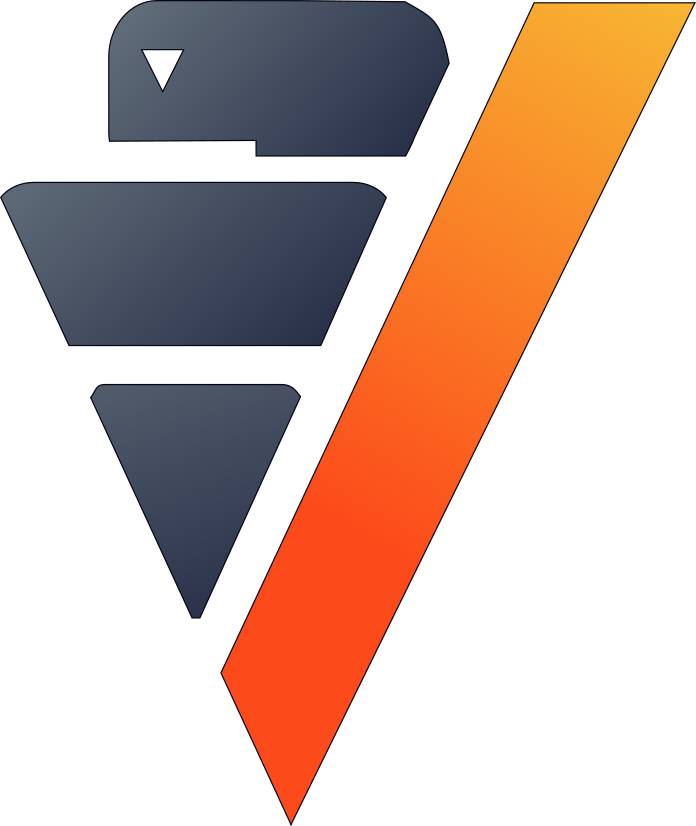

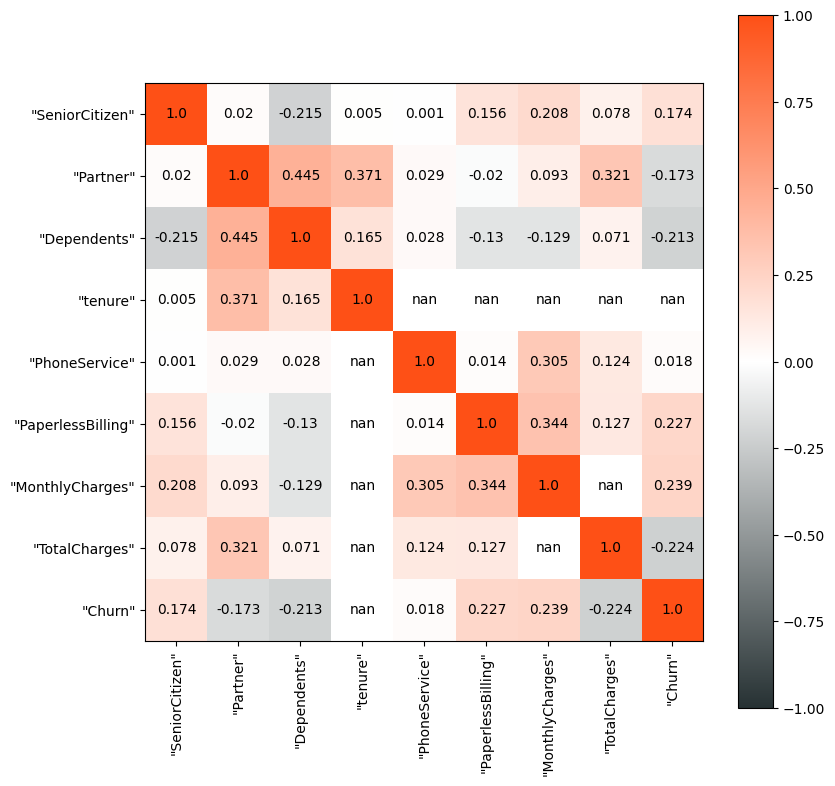

In [11]:
data_vdf.corr(method = "biserial")

Lastly, we'll look at the relationship between categorical columns. In this case, the 'Cramer's V' method is very efficient. Since there is no position in the Euclidean space for those variables, the 'Cramer's V' coefficients cannot be negative (which is a sign of an opposite relationship) and will range in the interval [0,1].
```pyhon
vdf.corr(method = "cramer")
```

  0%|          | 0/17 [00:00<?, ?it/s]

,"""customerID""","""gender""","""SeniorCitizen""","""Partner""","""Dependents""","""PhoneService""","""MultipleLines""","""InternetService""","""OnlineSecurity""","""OnlineBackup""","""DeviceProtection""","""TechSupport""","""StreamingTV""","""StreamingMovies""","""Contract""","""PaperlessBilling""","""PaymentMethod""","""Churn"""
"""customerID""",1,0.707107694055843,0.8342808377539406,0.7115657844223414,0.7791534643650283,0.9087175515857313,0.8422585224229809,0.834919467870259,0.846427147710105,0.8332966491996842,0.8336358680436916,0.8445230487734628,0.8290116546639985,0.8290487687104929,0.8638595091270586,0.7343269039296677,0.872500267957723,0.7071071869063799
"""gender""",0.707107694055843,1,0.004892137491916976,0.007364667575738372,0.0015780059015648913,0.02411608009639801,0.024546385318447658,0.02717297479573826,0.03205449917126402,0.007534222722698966,0.006697085681187882,0.010024860911526233,0.005712967755682991,0.010227595363888535,0.020702587450334386,0.00566864420110765,0.02401256611713189,0.0032119965028377883
"""SeniorCitizen""",0.8342808377539406,0.004892137491916976,1,0.019710533018706372,0.21463875564112417,0.0006868773728840309,0.16658802111971255,0.25742589688247824,0.21090204888459332,0.17984206260912294,0.18066259986790134,0.22487228613173485,0.18159429473480898,0.1852807710150987,0.15849689333346847,0.15633617781242715,0.1885664872103225,0.17397025979209088
"""Partner""",0.7115657844223414,0.007364667575738372,0.019710533018706372,1,0.4449960980265759,0.028770755146611853,0.14671313461715443,0.04485577285298185,0.13826112526367001,0.1571582619801523,0.1600756243104993,0.12469832793775476,0.1506341609633647,0.1386679688790269,0.27968378881119943,0.01975039119990091,0.1458211871144208,0.17291047934219533
"""Dependents""",0.7791534643650283,0.0015780059015648913,0.21463875564112417,0.4449960980265759,1,0.028046485748838938,0.04985091257118706,0.2080369993663885,0.2201430670808221,0.19464351920229792,0.19257265563247253,0.20963728053851416,0.18859682512393766,0.1816067623513326,0.2539786194300246,0.12963913902442506,0.1671697580588008,0.2127274055151051
"""PhoneService""",0.9087175515857313,0.02411608009639801,0.0006868773728840309,0.028770755146611853,0.028046485748838938,1,0.9087175515857313,0.40780168540159395,0.07837630423534378,0.07370618691877649,0.07361055519847112,0.08057210323103006,0.08565005874505655,0.08809834903588973,0.00927541784010701,0.014032644275810552,0.029455556078181996,0.018496984203847894
"""MultipleLines""",0.8422585224229809,0.024546385318447658,0.16658802111971255,0.14671313461715443,0.04985091257118706,0.9087175515857313,1,0.3733726973782987,0.1909555579302466,0.21345351548133007,0.2113765679709339,0.1909210089048814,0.23351135879430976,0.23946711072015686,0.05714460251676183,0.17560137015673724,0.16313848178712076,0.05707088827012791
"""InternetService""",0.834919467870259,0.02717297479573826,0.25742589688247824,0.04485577285298185,0.2080369993663885,0.40780168540159395,0.3733726973782987,1,0.61813165117656,0.5997120497290093,0.5996419009188891,0.6168508728568396,0.6140407667475017,0.6139908066055576,0.22528125139924296,0.3780929199875539,0.31884883880040665,0.3824668874325322
"""OnlineSecurity""",0.846427147710105,0.03205449917126402,0.21090204888459332,0.13826112526367001,0.2201430670808221,0.07837630423534378,0.1909555579302466,0.61813165117656,1,0.6143522793766889,0.612357890912976,0.6289664524066284,0.6005023776110086,0.6001577885770959,0.3055814668398435,0.33811309260869854,0.3057054236567338,0.405771030663633
"""OnlineBackup""",0.8332966491996842,0.007534222722698966,0.17984206260912294,0.1571582619801523,0.19464351920229792,0.07370618691877649,0.21345351548133007,0.5997120497290093,0.6143522793766889,1,0.6167090682705494,0.6166994683522765,0.6092638449490245,0.6078943213905467,0.27498322868999475,0.3144606215472826,0.2868947127699331,0.3563652011427006

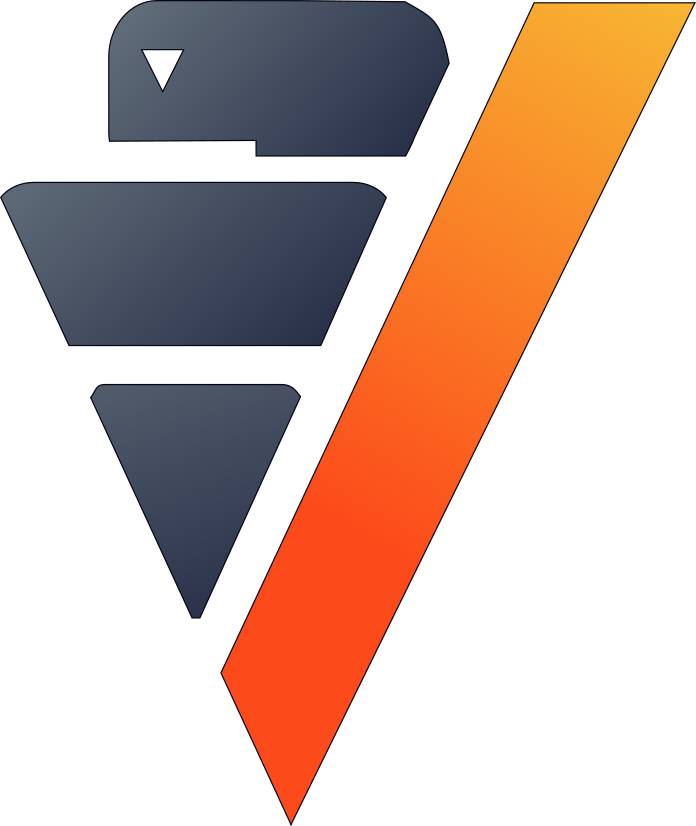

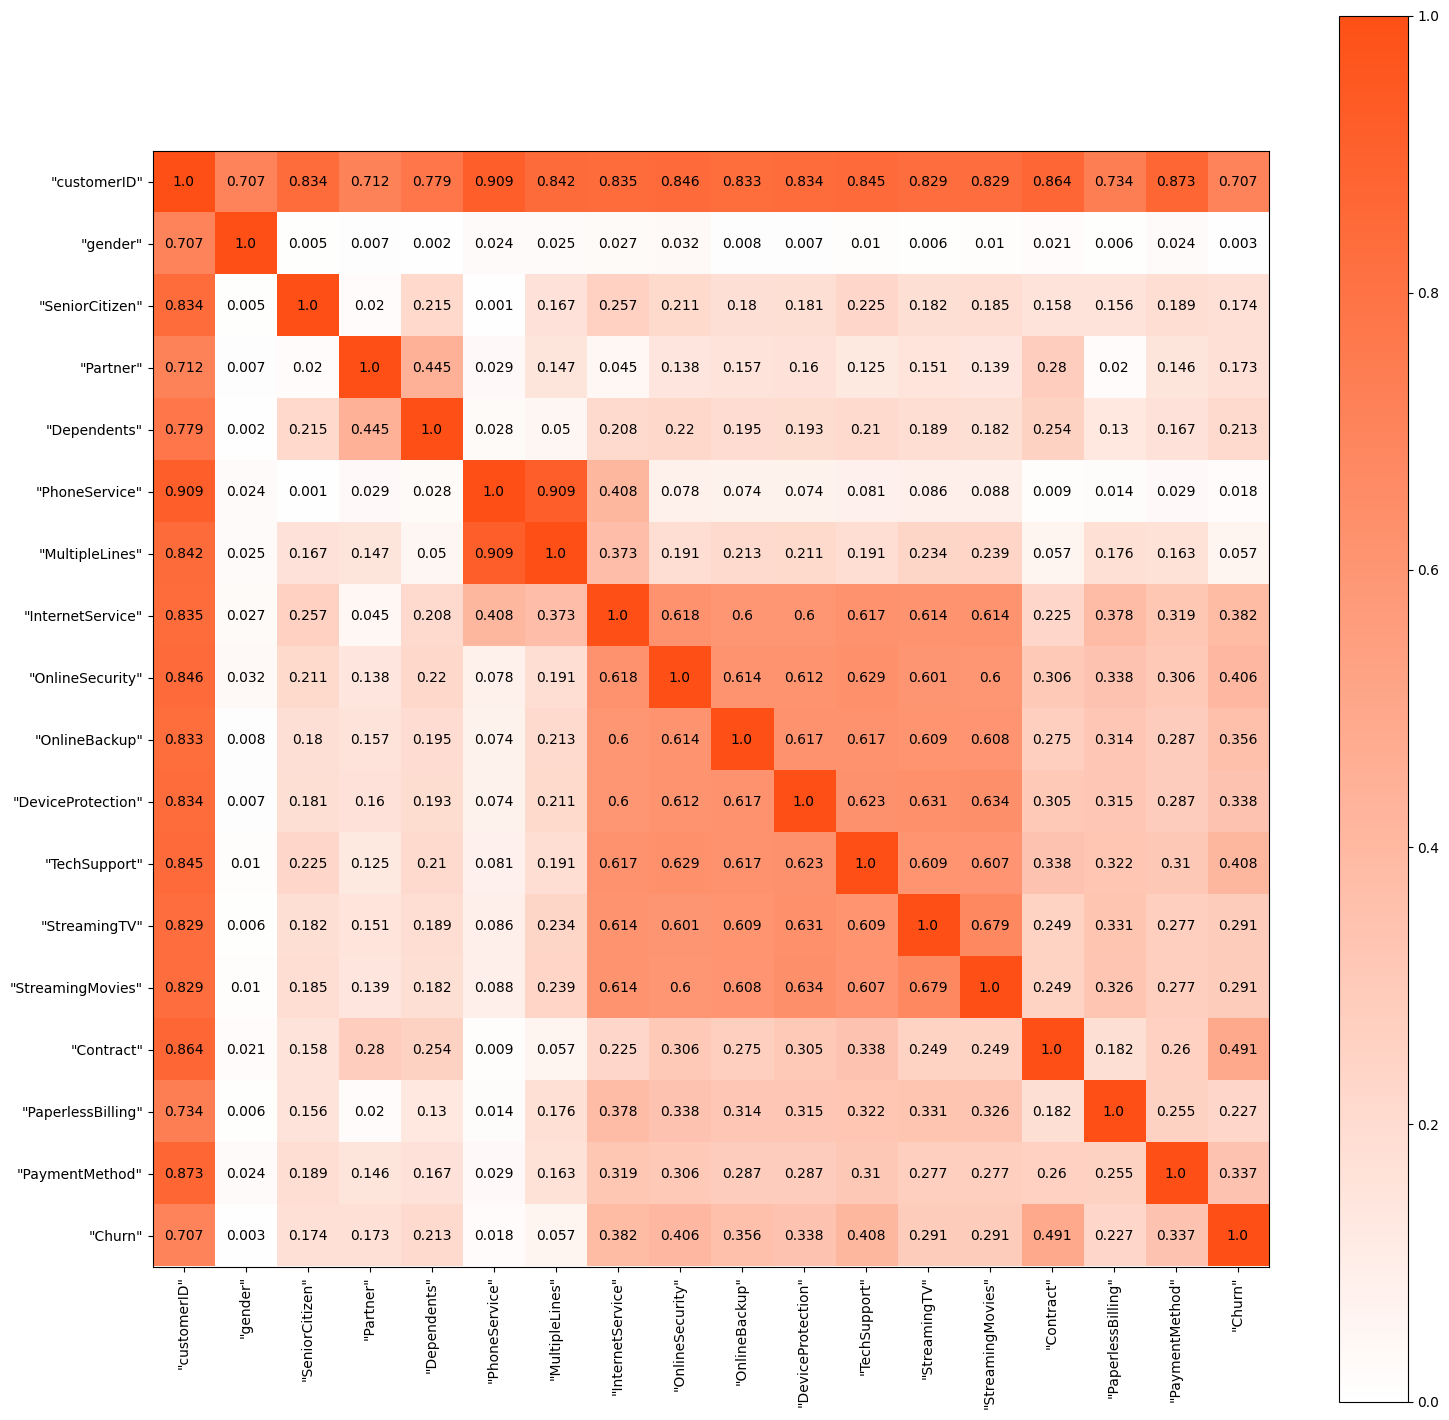

In [13]:
data_vdf.corr(method = "cramer")

#### Feature-Response

It is also critical to know the correlation between the features and the response. This can give us an idea of which features are most important for the response.

In VerticaPy, the *focus* parameter allows us to easily find the correlation quantities with respect to the response.

```python
data_vdf.corr(method = "cramer", focus = "Churn")
```

,"""Churn"""
"""Churn""",1
"""customerID""",0.7071071869063799
"""Contract""",0.4907919296971026
"""TechSupport""",0.40838017039034696
"""OnlineSecurity""",0.405771030663633
"""InternetService""",0.3824668874325322
"""OnlineBackup""",0.3563652011427006
"""DeviceProtection""",0.3375788412575336
"""PaymentMethod""",0.3374402962899926
"""StreamingTV""",0.2914328311128606

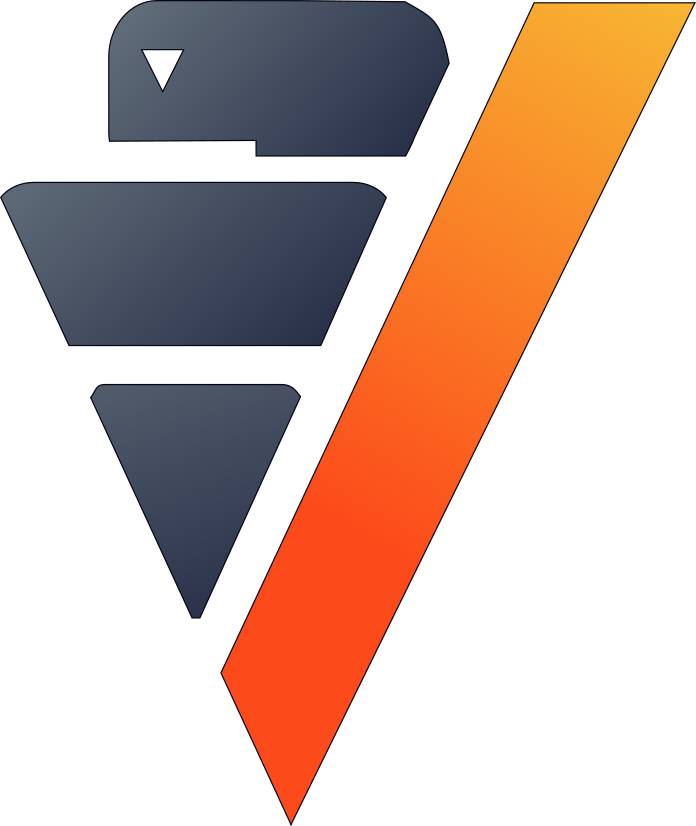

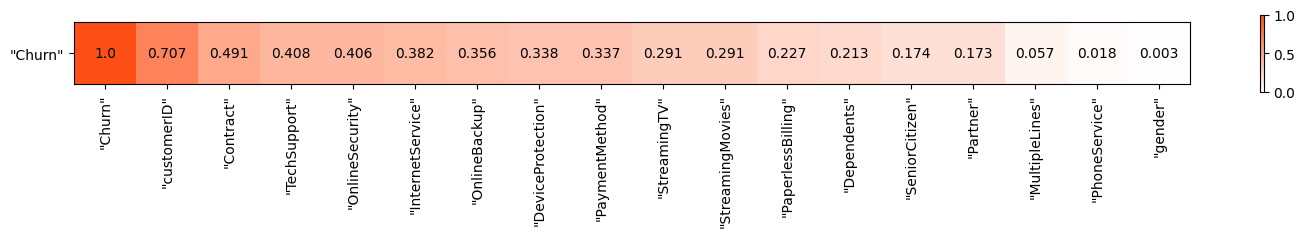

In [14]:
data_vdf.corr(method = "cramer", focus = "Churn")

Sometimes a correlation coefficient can lead to incorrect assumptions, so we should always look at the coefficient p-value.

```python
vdf.corr_pvalue("Churn", "customerID", method = "cramer",)
```

In [16]:
data_vdf.corr_pvalue("Churn", "customerID", method = "cramer",)

(0.7071071869063799, 0.44168062790257256)

We can see that churning correlates to the type of contract (monthly, yearly, etc.). This makes sense: you would expect that different types of contracts differ in flexibility for the customer, and particularly restrictive contracts might make churning more likely.

Churning also appears to correlate with the type of internet service. Let's split the categories into binaries to better understand which services can influence the global churning rate.

```python
vdf["InternetService"].one_hot_encode()
vdf.corr(method = "spearman", 
         focus = "Churn", 
         columns = ["InternetService_DSL", 
                    "InternetService_Fiber_optic"])
```

In [29]:
file = open("Figures/fig12.png", "rb")
image = file.read()

image= widgets.Image(
                    value=image,
                    format='png',
                    width='200px'
                )
display(image)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xfa\x00\x00\x012\x08\x06\x00\x00\x00\xd3 \xcdP\x…

We can see that the Fiber Optic option is particularly linked to a customer's likelihood to churn. Let's compute some aggregations to find a causal relationship.

```python
vdf["contract"].one_hot_encode()
vdf.groupby(["InternetService_Fiber_optic"], 
            ["AVG(tenure) AS tenure", 
             "AVG(totalcharges) AS totalcharges",
             'AVG("contract_month-to-month") AS "contract_month-to-month"',
             'AVG("monthlycharges") AS "monthlycharges"'])
```

In [31]:
file = open("Figures/fig13.PNG", "rb")
image = file.read()

image= widgets.Image(
                    value=image,
                    format='png',
                    width='800px'
                )
display(image)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\xe7\x00\x00\x00\xd3\x08\x06\x00\x00\x00\xca\xc6w…

Now we can take another look at tenure on the response function:
 
```python
data_vdf["tenure"].boxplot(by = "churn")
```



In [35]:
file = open("Figures/fig14.png", "rb")
image = file.read()

image= widgets.Image(
                    value=image,
                    format='png',
                    width='500px'
                )
display(image)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03I\x00\x00\x02"\x08\x06\x00\x00\x00\x1d=\x83m\x00\…

This tells us that newer users are more likely to churn than older ones. If we are able to hold onto users for a little longer, they might not churn. 

We can further hone in on the tenure ranges that result in the greatest churn by using the VerticaPy hchart plot.

```python
data_vdf.hchart(x = "tenure",
               y = "churn",
               z = "COUNT(*)",
               kind = "heatmap")
```

In [37]:
file = open("Figures/fig15.PNG", "rb")
image = file.read()

image= widgets.Image(
                    value=image,
                    format='png',
                    width='700px'
                )
display(image)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\x9c\x00\x00\x02\xd0\x08\x06\x00\x00\x00\xd5dj\xf…

From the above table, we can see that the tenure range of 0-4 is most susceptible to churn. As the time increases, the number of people churning decreases.

***

### Closing Remarks

The above examples demonstrated only some of the data exploration techniques that are available using the efficient and visually appealing plots and features of VerticaPy. There is a lot that can be done in the exploration phase, but we have restricted our study to the basics here. These tools/functions should be sufficient for you to start generating insights on your own tabular data. Good luck! 

In [ ]:
%%javascript
// When the user scrolls the page, execute myFunction
window.onscroll = function() {myFunction()};

// Get the navbar
var navbar = document.getElementById("navbar_top");

// Get the offset position of the navbar
var sticky = navbar.offsetTop;

// Add the sticky class to the navbar when you reach its scroll position. Remove "sticky" when you leave the scroll position
function myFunction() {
  if (window.pageYOffset >= sticky+140) {
    navbar.classList.add("sticky")
  } else {
    navbar.classList.remove("sticky");
  }
  if (window.pageYOffset <= sticky) {
    navbar.classList.remove("sticky");
  }
}

<html>
<head>
<meta name="viewport" content="width=device-width, initial-scale=1">
<style>
a {
  text-decoration: none;
  display: inline-block;
  padding: 8px 16px;
}

a:hover {
  background-color: #ddd;
  color: black;
}

.previous {
  background-color: #f1f1f1;
  color: black;
}

.next {
  background-color: #F48B34;
  color: white;
}

.round {
  border-radius: 50%;
}
</style>
</head>
<body>

<a href="http://127.0.0.1:8889/voila/render/enablement/Data%20Science%20Essentials/Module%20-%20Data%20Exploration/Essentials_DataExploration.ipynb" font-size= 40px class="previous round">&#8249;</a>
<a href="http://127.0.0.1:8889/voila/render/enablement/Data%20Science%20Essentials/Module%20-%20Data%20Preparation/Essentials_DataPreparation.ipynb" class="next round">&#8250;</a>
  
</body>
</html> 

***

<font style="font-family:Calibri"> Author Name: Umar Farooq Ghumman
<br>
Author Contact: umarfarooq.ghumman@vertica.com</font>

### Resources

- [<font size='2'>Telco Churn Dataset</font>](https://www.vertica.com/python/data/churn.csv)
